# Espalhamento e Tunelamento Quântico

* Matéria: Física Quântica
* Aluno: José Arthur de Luna Oliveira
* Professor: Bruno Ricardo de Carvalho
* Data: 31/05/2024

$\quad$ Neste trabalho discutiremos sobre o espalhamento e tunelamento quântico.

Neste `Notebook` haverá as seguintes seções:

* Introdução;
* Desenvolvimento do Problema;
* Conclusão.

## Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_ticks(x, y, step): #essa é uma função que mexe na aparência dos gráficos
    fig, ax = plt.subplots(figsize = (6,3))
    plt.minorticks_on()
    plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
    plt.xticks(np.arange(x[0], x[len(x)-1], step), minor = True)
    plt.yticks(np.arange(y[0], y[len(y)-1], step), minor = True)

## Detalhes da Biblioteca

In [25]:
%load_ext version_information
%version_information Matplotlib, Numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.11.9 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
Matplotlib 3.8.4
Numpy 1.26.4
Mon May 27 15:53:49 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ O espalhamento quântico é um fenômeno fundamental na Mecânica Quântica. Ele envolve o comportamento das partículas antes e após colidirem entre si. Durante o espalhamento, as propriedades das partículas, como sua posição, momento e energia, podem ser alteradas devido à interação das partículas. Entretanto, as leis da Mecânica Quântica determinam que essas mudanças não podem ser previstas de maneira determinística, apenas em termos de probabilidades.

$\quad$ O principal exemplo é o espalhamento de elétrons por núcleos atômicos. No qual, ocorre quando um elétron aproxima-se de um núcleo atômico, ele pode ser desviado de sua trajetória original, devido à interação eletromagnética entre as cargas elétricas do elétron e do núcleo. O resultado desse espalhamento pode variar de acordo com diversos fatores, incluindo a energia do elétron, a distância de aproximação e as propriedades específicas do núcleo. Em geral, o espalhamento quântico é o tipo de processos em que um estado inicial contínuo é transformado em um final contínuo através da ação de algum potencial **[1]**.

$\quad$ Nesse trabalho, exploraremos dois casos de espalhamento: o primeiro será uma partícula atingindo um potencial degrau e depois um potencial barreira. O objetivo é encontrar a taxa de transmissão da partícula nesses casos e mostrar a variação dessa taxa em função da energia inicial da partícula.

$\quad$ Dito isso, para conseguirmos desenvolver o problema trocaremos a partícula por um pacote de onda $\psi_I(x)$, na qual quando atinge a barreira de potencial haverá uma onda refletida $\psi_R(x)$ e outra transmitidas $\psi_T(x)$. O problema em questão é encontrar a probabilidade de encontrar a partícula na região I ($R$) e a probabilidade de encontrar na região II ($T$), para encontrar esses dois valores basta determinar as seguintes integrais,

devemos calcula-las considerando $t \rightarrow \infty$. 

$\quad$ Em geral, $R$ e $T$ dependem diretamente do corpo da função de onda incidente. No entanto, mantendo o momento inicial bem definido, ou seja, $\Delta p \rightarrow 0$ e $\Delta x \rightarrow \infty$. Assim, o resultado dependerá apenas do valor da energia inicial **[1]**.

## 2. Potencial Degrau

$\quad$ Nesse caso, imaginemos uma partícula livre, viajando da direita para a esquerda, com energia $E$ em uma região I ($x \leq 0$), em $x>0$ é a região II, onde há ação de potencial $V = V_0$. Na Mecânica Clássica, as duas possibilidades de resultados, caso $E<V_0$ a partícula é refletida, ela não consegue ir para a região II, entretanto, se $E>V_0$ ela consegue passar para a outra região. Em contrapartida, na Mecânica Quântica, se $E<V_0$ existe probabilidade da partícula passar para a região II, esse fenômeno é chamado de Tunelamento.

$\quad$ Nosso objetivo nesse caso é determinar a probabilidade de transmissão da partícula em diferentes energias.

### 2.1 Desenvolvimento Teórico

$\quad$ Para podermos visualizar melhor o potencial desse caso, plotaremos o gráfico do potencial. Para esse exemplo consideraremos $V_0 = 100$. Assim,

In [84]:
x = np.linspace(-50, 50, 1000)
V = np.zeros(len(x))

for i in range(len(x)):
    if x[i]<0:
        V[i] = 0
    else:
        V[i] = 100   

Text(0, 0.5, 'V(x)')

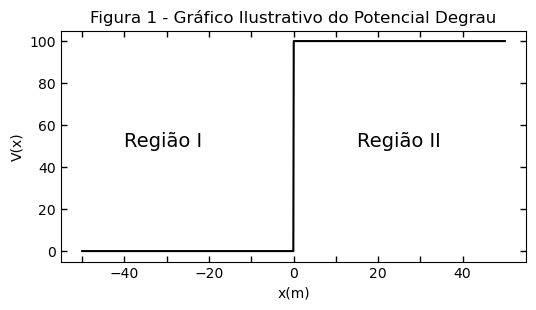

In [88]:
fig, ax = plt.subplots(figsize = (6,3))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(-50, 50, 20), minor = True)
plt.yticks(np.arange(0, 100, 20), minor = True)

plt.plot(x, V, color = "black")

plt.text(-40, 50, "Região I", fontsize = 14)
plt.text(15, 50, "Região II", fontsize = 14)

plt.title("Figura 1 - Gráfico Ilustrativo do Potencial Degrau")
plt.xlabel("x(m)")
plt.ylabel("V(x)")

em o nosso potencial é definido da seguinte forma

$$  {\begin{cases}
        V(x) = 0, \ para \ x<0\\
        \\
        V(x) = V_0, \ para \ x > 0 \\
        \end{cases}
        } \ .$$

$\quad$ Com isso, começaremos pela equação de Schrödinger independente do tempo

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V(x))\psi(x) = 0 \ . \tag{2.1}$$

$\quad$ Na região I, onde $V(x) = 0$, a Equação **(2.1)** ficará assim

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}E\psi(x) = 0$$

$$\implies \frac{d^2\psi(x)}{dx^2} = -\frac{2mE}{\hbar^2}\psi(x)$$

a solução geral dessa equação é $\psi(x) = Ae^{ik_1x} + Be^{-ik_1x} $, em que  $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. Note que o termo a esquerda pertence ao pacote de onda incidente e o termo da direita ao pacote de onda refletido, pois o primeiro viaja no sentido positivo de $x$ e o outro no sentido negativo. Assim,

$$\psi_i(x) = Ae^{ik_1x} \tag{2.2} \ , \$$

$$\psi_R(x) = Be^{-ik_1x} \tag{2.3} \ .$$

$\quad$ Em seguida, na região II a Equação **(2.1)** terá a seguinte forma,

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V_0)\psi(x) = 0$$

$$ \frac{d^2\psi(x)}{dx^2} = - \frac{2m}{\hbar^2}(E - V_0)\psi(x)$$

a solução geral dessa equação é possui a mesma forma que a da anterior,

$$\psi(x) = Ce^{ik_2x} + De^{-ik_2x} \ , \tag{2.4}$$

na qual, $k_2 = \sqrt{\frac{2m}{\hbar^2}(E - V_0)}$. Perceba que podemos definir $D = 0$, porque nesse problema na região II não deve ter uma onda indo no sentido negativo de $x$, apenas haverá o pacote de onda transmitido. Logo,

$$\psi_T(x) = Ce^{ik_2x} \tag{2.5} \ ,$$

$\quad$ Para que essas soluções sejam desse caso, elas devem obedecer as seguintes condições de contorno (condições de continuidade):
$$  {\begin{cases}
        \psi_i(0) + \psi_R(0) = \psi_T(0)\\
        \\
        \frac{d\psi_i}{dx}|_{x=0} + \frac{d\psi_R}{dx}|_{x=0} = \frac{d\psi_T}{dx}|_{x=0} \\
        \end{cases}
        } \ .$$

$\quad$ Expandindo as condições de contorno temos,
$$  {\begin{cases}
        A + B = C \\
        \\
        k_1A - k_1B = k_2C \implies A - B = \frac{k_2}{k_1}C \\
        \end{cases}
        } \ .$$

$\quad$ Faremos a seguir algumas manipulações algébricas para por a amplitude $C$ em função da amplitude $A$. Assim, somando essas duas equações, logo

$$ 2A = C + \frac{k_2}{k_1}C $$

$$ \implies 2A = ( 1 + \frac{k_2}{k_1})C \implies 2A = \frac{k_1 + k_2}{k_1}C $$

$$ \therefore \boxed{ C = \frac{2k_1}{k_1 + k_2}A} \ . \tag{2.6}$$

$\quad$ Este resultado será importante para determinarmos a probabilidade da onda ser transmitida, pois para determinar esse valor usaremos a seguinte relação,

$$ T = \frac{k_2}{k_1}\frac{|C|^2}{|A|^2} \ . \tag{2.7}$$

$\quad$ Substituindo as Equação **(2.5)** na **(2.6)**, teremos

$$ T =  \frac{k_2}{k_1}|\frac{2k_1}{k_1 + k_2}A|^2\frac{1}{|A|^2}$$

$$ \implies T =  \frac{k_2}{k_1}\frac{4(k_1)^2}{(k_1 + k_2)^2}\frac{|A|^2}{|A|^2}$$

$$ \implies T = \frac{4k_1k_2}{(k_1 + k_2)^2} \ ,$$

trocando $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$ e $k_2 = \sqrt{\frac{2m}{\hbar^2}(E - V_0)}$, na equação acima, teremos

$$ T = \frac{4\sqrt{\frac{2mE}{\hbar^2}}\sqrt{\frac{2m}{\hbar^2}(E - V_0)}}{\left(\sqrt{\frac{2mE}{\hbar^2}} + \sqrt{\frac{2m}{\hbar^2}(E - V_0)}\right)^2} $$

$$ \implies T = \frac{4\frac{2m}{\hbar^2}\sqrt{E}\sqrt{E - V_0}}{\frac{2m}{\hbar^2}\left(\sqrt{E} + \sqrt{E - V_0}\right)^2} $$

$$ \therefore \boxed{ T = \frac{4\sqrt{E}\sqrt{E - V_0}}{\left(\sqrt{E} + \sqrt{E - V_0}\right)^2}} \ . \tag{2.8}$$

$\quad$ Para determinar o coeficiente de reflexão é simples, basta lembrar que $R + T = 1$, logo

$$R = 1 - T \ . \tag{2.9}$$

$\quad$ Com essas equações podemos determinar a solução do problema, apenas com a informação da energia $E$ e da altura do potencial degrau $V_0$.

### 2.2 Aplicação Numérica

$\quad$ Encontraremos agora as soluções para o nosso problema. O algoritmo a ser montado é de certa forma simples. Basta aplicar a Equação **(2.7)** que encontraremos as soluções. Definiremos $V_0 = 50 \ J$ e veremos a variação de $T$ com $0 \ J \leq E \leq 200 \ J$.

In [89]:
E = np.linspace(0, 200, 10000) #valores das energias
T = np.zeros(len(E))
V = 50
for i in range(len(E)):
    if E[i] < V:
        temp1 = 4*np.sqrt(E[i])*complex(0,1)*np.sqrt(V - E[i])
        temp2 = abs(np.sqrt(E[i]) + complex(0,1)*np.sqrt(V - E[i]))**2
    else:
        temp1 = 4*np.sqrt(E[i])*np.sqrt(E[i] - V)
        temp2 = abs(np.sqrt(E[i]) + np.sqrt(E[i] - V))**2
    T[i] = temp1/temp2

C:\Users\olive\AppData\Local\Temp\ipykernel_24308\1908001230.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  T[i] = temp1/temp2


$\quad$ Plotaremos agora o gráfico dos coeficientes $T$ e $R$ em função da energia.

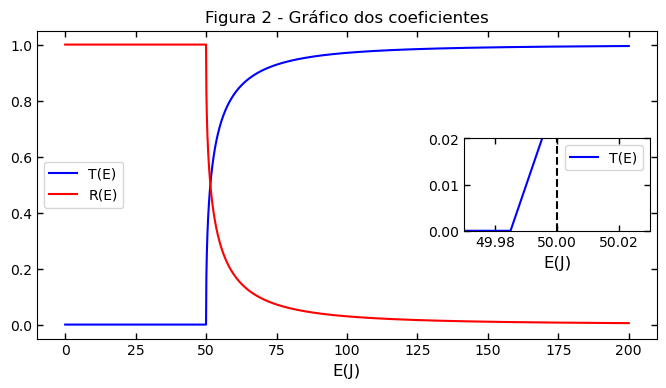

In [90]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(0, 200, 50), minor = True)
plt.yticks(np.arange(0, 1, 0.2), minor = True)

ax.plot(E, T, label = "T(E)", color = "blue")
ax.plot(E, 1 - T, label = "R(E)", color = "red")

plt.title("Figura 2 - Gráfico dos coeficientes", fontsize = 12)
plt.xlabel("E(J)", fontsize = 12)
ax.legend(loc='center left')

ax_inset = inset_axes(ax, width="30%", height="30%", loc='center right')
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(0, 200, 50), minor = True)
plt.yticks(np.arange(0, 1, 0.2), minor = True)

ax_inset.plot(E, T, label='T(E)', color='blue')
ax_inset.axvline(x = 50, color = 'black', linestyle = '--')

plt.ylim(0, 0.02)
plt.xlim(49.97, 50.03)

ax_inset.set_xlabel('E(J)', fontsize = 12)
ax_inset.legend()

$\quad$ Observando a Figura **2**, veremos que em energias menores que a altura do degrau possui uma probabilidade de ser transmitida igual a zero, mas note que quando o $E$ aproxima-se do valor de $V_0$, como pode ser visto no subplot, a probabilidade do pacote de onda ser transmitida não mais nulo. Em outras palavras, a uma pequena chance da onda ir para região II, mesmo que $E<V_0$. Isso corroborando com o falado na Introdução, obedecendo às leis da mecânica quântica.

$\quad$ A seguir, plotaremos o gráfico dos pacotes de onda. Para isso, solucionaremos numericamente a equação de Schrödinger na região I, normalizaremos a função de onda encontrada e nesse processo encontraremos a amplitude do pacote de onda incidente $A$. Feito isso, conseguimos determinar a amplitude da onda transmitida, conseguinte, definiremos o pacote de onda transmitido.

$\quad$ Para solucionar a equação de Schrödinger na região I usaremos o método numérico de Numerov **[5]**. Tal método foi criado justamente para resolver equações diferenciais de segunda ordem sem a informação da primeira derivada (caso o leitor queira se aprofundar sobre esse método, aconselho a leitura da referência **[5]**). No nosso caso apenas precisamos aplicar a equação de recorrência do método, definido abaixo

$$ \psi(x + \delta) = \frac{2\left[ 1 - \frac{5\delta^2}{12}k^2(x)\right]\psi(x) - \left[ 1 + \frac{\delta^2}{12}k^2(x - \delta) \right]\psi(x-\delta)}{ 1 + \frac{\delta^2}{12}k^2(x+\delta)} \ , \tag{2.10}$$

no qual, $\delta$ é o passo de integração, este é um valor muito pequeno, e como só aplicaremos na região I, então $k(x) = \sqrt{\frac{2mE}{\hbar^2}}$, a fim de simplificar consideraremos $\hbar = 1 \ J.s$ e $m = 1 \ kg$. A Equação **(2.10)** está definida como uma função na célula abaixo.

In [61]:
def eq_rec(E, delta, x, psi, i):
    m, h = 1, 1 # definindo o vlaor da massa e da constante de Planck, estão em Kg e m².kg/s, respectivamente
    k = np.sqrt(2*m*E/h**2) # definindo o ko
    temp1 = 2*(1-(5*(delta**2)/12)*(k**2))*psi[i-1]
    temp2 = (1+ (delta**2/12)*(k**2))*psi[i-2]
    temp3 = 1 + (delta**2/12)*(k**2)
    return (temp1 - temp2)/temp3 #resultado da equação de recorrência

$\quad$ O método consiste em aplicar a Equação **(2.9)** no intervalo $[a, \ b]$, de forma que precisamos apenas conhecer dois pontos consecutivos iniciais e com eles determinar o resto da função. Assim, devemos definir $\psi(a) = 0$ e $\psi(a + \delta) = \delta$, em que, $\delta$ é um valor muito pequeno. Sabendo disso, podemos criar a função para determinar função de onda.

In [62]:
def fpsi(E, a, b):
    x = np.linspace(a, b, 1000) #definindo o intervalo de integração
    delta = abs(x[1] - x[0]) #passo integração
    psi = np.zeros(len(x)) #definindo um array para armazenar os valores da solução

    #os dois primeiros pontos consecutivos da solução
    psi[0] = 0 
    psi[1] = delta
    
    for i in range(2, len(x)):
        psi[i] = eq_rec(E, delta, x, psi, i) #aplicando a equação de recorrência
    return psi, x

$\quad$ Feito isso, criaremos uma função para normalizar a solução encontrada e determinar a amplitude do pacote de onda. Para isso, lembre-se que uma autofunção normalizada deve atender a propriedade que $\int_{ - \infty}^{\infty} |\Psi(x, \ t)|^2dx = 1$, assim podemos fazer

$$\int_{ - \infty}^{\infty} |\Psi(x, \ t)|^2dx = 1 \implies \int_{ - \infty}^{\infty} A^2|f(x, \ t)|^2dx = 1$$

$$\therefore \boxed{A = \frac{1}{\sqrt{\int_{ - \infty}^{\infty} |f(x, \ t)|^2dx}}} \ ,$$

no qual, $A$ é amplitude da autofunção normalizada, em que $\Psi(x, \ t) = Af(x, \ t)$. Dessa forma, após solucionar a equação Schrödinger obteremos $\psi(x)$, multiplicando essa solução por $ \phi(t) = e^{-iEt/\hbar}$ obteremos $f(x, \ t)$ e com esse dado podemos encontrar a amplitude $A$. Para calcular a integral utilizaremos o método de Simpsons **[6, 7]**. Abaixo está a função definida para normalizar a função de onda e obter a amplitude do pacote de onda normalizado.

In [63]:
def psi_norm(psi, E, t, a, b):
    N = len(psi)
    h = abs(b-a)/N
    x = np.linspace(a, b, N) #intervalo de integração
    psi = psi*np.exp(-complex(0, 1)*E*t/1) #multiplicando a função de onda pelo termo de dependência do tempo

    #aplicando o método de Simpison para determinar o resultaod da integral
    s_p, s_i = 0, 0
    s_0 = abs(psi[0])**2 + abs(psi[N-1])**2
    for i in range(1, N-1):
        if i%2 == 0:
            s_p += abs(psi[i])**2
        else:
            s_i += abs(psi[i])**2
    S_f = h*(s_0 + 2*s_p + 4*s_i)/3

    A = np.sqrt(1/S_f) #encontrando a amplitude da função de onda 
    psi = A*psi #normalizando a função de onda
    return psi, A

$\quad$ Definindo todas essas funções, agora podemos determinar os pacotes de ondas incidentes e transmitidos, e finalmente plotar o gráfico deles, para podermos ver o comportamento desses pacotes.

$\quad$ Com isso, iremos por $E = 40 \ J$ e $V = 50 \ J$. Após isso, calcularemos a solução da Equação Schrödinger na região I chamando a função `fpsi`. Encontrando essa solução, usaremos a função `psi_norm` para normalizar a solução e determinar a amplitude do pacote de onda incidente. Em seguida, após encontrar a amplitude, calcularemos a amplitude da onda transmitida $C$ e com a Equação **(2.4)** encontraremos a onda transmitida. Feito isso, plotaremos o gráfico delas. Vale salientar, que região I e região II serão os intervalos $[-5, \ 0]$ e $[0, \ 5]$, respectivamente, e também o estaremos fazendo isso em $t = 10^{6} \ s$, esse valor será necessário para usar a função `psi_norm`.

In [91]:
E = 40 #valor das energias
V = 50 #tamanho do potencial degrau

psi_i, x_i = fpsi(E, -5, 0) #determinando a solução da equação Schrödinger
psi_i, A = psi_norm(psi_i, E, 1e6, -5, 0) #normalizando 

x_T = np.linspace(0, 5, 1000) # região II

#Determinando a amplitude C
if E < V:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + complex(0,1)*np.sqrt(V - E))**2
    psi_T = np.exp(-np.sqrt(2*1*(V-E)/1**2)*x_T)
else:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + np.sqrt(E - V))**2
    psi_T = np.exp(complex(0,1)*np.sqrt(2*1*(E - V)/1**2)*x_T)
C = A*temp1/temp2

psi_T = C*psi_T #onda transmitida
psi_i = psi_i - (psi_i[len(psi_i)-1] - psi_T[0]) #isso é importante para que a onda transmitida comece de onde a onda incidente termina

$\quad$ Finalmente, poderemos plotaremos o gráfico.

In [92]:
x = np.linspace(-5, 5, 100)
V = np.zeros(100)

for i in range(100):
    if x[i]<0:
        V[i] = 0
    else:
        V[i] = 50

Text(0, 0.5, '$\\psi(x, t)$')

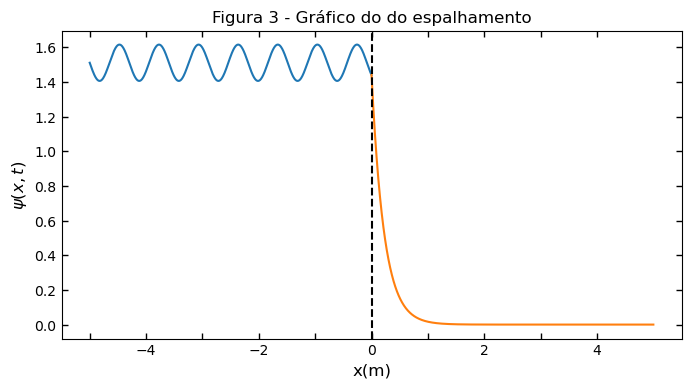

In [93]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(-5, 5, 1), minor = True)
plt.yticks(np.arange(0, 1.6, 0.2), minor = True)

plt.plot(x_i, psi_i)
plt.plot(x_T, psi_T)

plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.title("Figura 3 - Gráfico do do espalhamento", fontsize = 12)
plt.xlabel("x(m)", fontsize = 12)
plt.ylabel(r"$\psi(x, t)$", fontsize = 12)

$\quad$ Observando esse gráfico, vemos que na região II o pacote de onda decai rapidamente numa exponencial, isso é devido à diferença da energia da partícula com o potencial degrau, lembre-se que a energia $E = 40 \ J$ possui um coeficiente de transmissão muito próxima de zero, como pode ser visto na Figura **2** dos coeficientes. Em seguida, plotaremos esse mesmo gráfico, porém para $E = 49.99 \ J$, esta energia já possui uma probabilidade de passar pela barreira diferente de zero, como pode ser visto na Figura **2**.

In [98]:
E = 49.99
V = 50
psi_i, x_i = fpsi(E, -5, 0)
psi_i, A = psi_norm(psi_i, E, 1e6, -5, 0) 
x_T = np.linspace(0, 5, 1000)

if E < V:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + complex(0,1)*np.sqrt(V - E))**2
    psi_T = np.exp(-np.sqrt(2*1*(V-E)/1**2)*x_T)
else:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + np.sqrt(E - V))**2
    psi_T = np.exp(complex(0,1)*np.sqrt(2*1*(E - V)/1**2)*x_T)
    
C = A*temp1/temp2
psi_T = C*psi_T
psi_i = psi_i - (psi_i[len(psi_i)-1] - psi_T[0])

In [99]:
x = np.linspace(-5, 5, 100)
V = np.zeros(100)

for i in range(100):
    if x[i]<0:
        V[i] = 0
    else:
        V[i] = 50

Text(0, 0.5, '$\\psi(x, t)$')

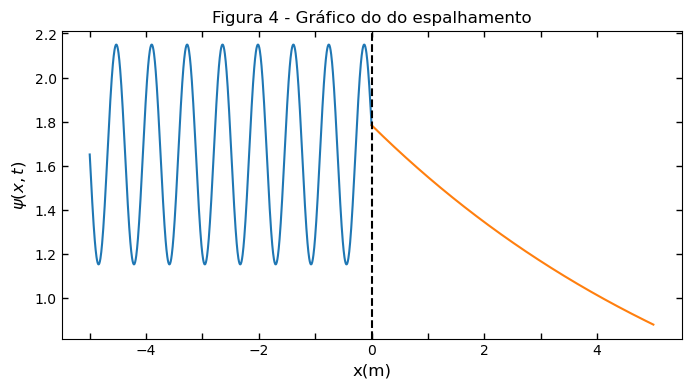

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(-5, 5, 1), minor = True)
plt.yticks(np.arange(0, 1.6, 0.2), minor = True)

plt.plot(x_i, psi_i)
plt.plot(x_T, psi_T)

plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.title("Figura 4 - Gráfico do do espalhamento", fontsize = 12)
plt.xlabel("x(m)", fontsize = 12)
plt.ylabel(r"$\psi(x, t)$", fontsize = 12)

$\quad$ Observe, que diferente da Figura **3** nesse caso a partícula decai muito mais devagar, quase que numa linha reta. Plotaremos agora o mesmo tipo de gráfico, no entanto, com $E = 60 \ J$.

In [96]:
E = 60
V = 50
psi_i, x_i = fpsi(E, -5, 0)
psi_i, A = psi_norm(psi_i, E, 1e6, -5, 0) 
x_T = np.linspace(0, 5, 1000)

if E < V:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + complex(0,1)*np.sqrt(V - E))**2
    psi_T = np.exp(-np.sqrt(2*1*(V-E)/1**2)*x_T)
else:
    temp1 = 2*np.sqrt(E)
    temp2 = abs(np.sqrt(E) + np.sqrt(E - V))**2
    psi_T = np.exp(complex(0,1)*np.sqrt(2*1*(E - V)/1**2)*x_T)
    
C = A*temp1/temp2
psi_T = C*psi_T
psi_i = psi_i - (psi_i[len(psi_i)-1] - psi_T[0])

Text(0, 0.5, '$\\psi(x, t)$')

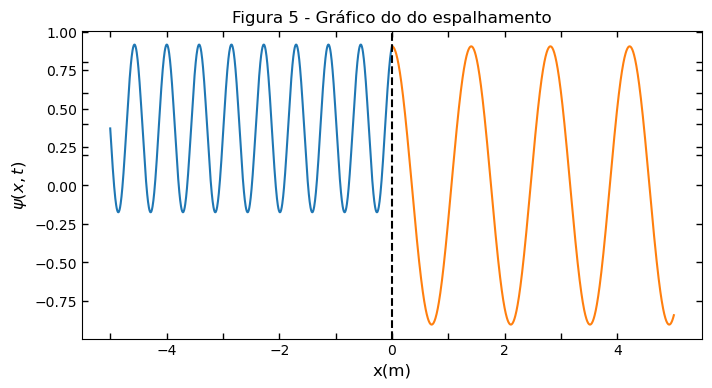

In [97]:
x = np.linspace(-5, 5, 100)
V = np.zeros(100)

for i in range(100):
    if x[i]<0:
        V[i] = 0
    else:
        V[i] = 50
        
fig, ax = plt.subplots(figsize=(8, 4))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(-5, 5, 1), minor = True)
plt.yticks(np.arange(0, 1.6, 0.2), minor = True)

plt.plot(x_i, psi_i)
plt.plot(x_T, psi_T)

plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.title("Figura 5 - Gráfico do do espalhamento", fontsize = 12)
plt.xlabel("x(m)", fontsize = 12)
plt.ylabel(r"$\psi(x, t)$", fontsize = 12)

$\quad$ Já nesse caso, percebe-se que na região II a partícula mantém um movimento oscilatório, diferente do que acontece na Figura **3** e **4**. Justamente, porque a partícula possui energia para passar o pelo potencial degrau. Note também que, a frequência do do pacote de onda na região II é menor que na região I, pois querendo ou não a partícula ainda o movimento da partícula ainda é afetada pelo potencial nessa região.

## 3. Potencial Barreira

$\quad$ Agora veremos o fenômeno do tunelamento em uma barreira potencial. Esse caso é bem semelhante com o anterior, no entanto, o potencial está entre $0 < x < a$. No qual, é chamado de região II e em $x>a$ é denominada de região III.

$\quad$ Dito isso, faremos praticamente o mesmo do caso anterior, encontraremos os coeficientes de transmissão e reflexão em função de $E$.

### 3.1 Desenvolvimento Teórico

$\quad$ Para este problema consideraremos um potencial degrau de forma que será definido da seguinte forma

$$  {\begin{cases}
        V(x) = 0, \ para \ x<0\\
        \\
        V(x) = V_0, \ para \ 0<x<a \\
        \\
        V(x) = 0, \ para \ x>a \\
        \end{cases}
        } \ ,$$

assim, primeiramente plotaremos um gráfico para o potencial e nesse exemplo também iremos considerar $V_0 = 100 \ J$ e $a = 10 \ m$, isso apenas para ilustração.

Text(0, 0.5, 'V(x)')

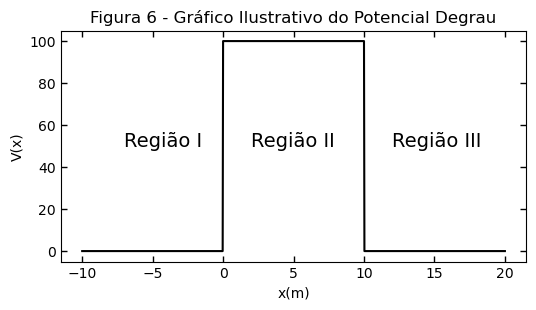

In [101]:
x = np.linspace(-10, 20, 1000)
V = np.zeros(len(x))
a = 10
for i in range(len(x)):
    if x[i]<0 or x[i]>a:
        V[i] = 0
    else:
        V[i] = 100
        
plot_ticks(x, V, 10)
plt.plot(x, V, color = "black")

plt.text(-7, 50, "Região I", fontsize = 14)
plt.text(2, 50, "Região II", fontsize = 14)
plt.text(12, 50, "Região III", fontsize = 14)

plt.title("Figura 6 - Gráfico Ilustrativo do Potencial Degrau")
plt.xlabel("x(m)")
plt.ylabel("V(x)")

$\quad$ Da mesma maneira do problema anterior, devemos começar com a equação de Schrödinger independente do tempo, Equação **(2.1)**. A solução dessa equação na região I e II será igual a mesma forma que o problema anterior. Em outras palavras, o pacote de onda incidente é definida como a Equação **(2.2)**, a refletida como a Equação **(2.3)** e na região II a Equação **(2.4)**. No entanto, como só estamos interessados na onda transmitida, a que se propaga para a direita, então podemos considerar o $D=0$ **[1]**. Assim,

$$ \psi_{II} = Ce^{ik_2x}\ . \tag{3.1}$$

$\quad$ Por fim, para a região III a Equação **(2.3)** terá a mesma forma que na região I, ou seja, possuem a mesma solução. Com isso, agora temos o pacote de onda após o tunelamento, a onda transmitida

$$ \psi(x) = Fe^{ik_1x} + Ge^{-ik_1x} \ .$$

$\quad$ No entanto, perceba que na região III, só haverá uma onda transmitida, que se propaga na direção positiva de $x$, assim $G = 0$. Logo,

$$\psi(x) = Fe^{ik_1x}\ . \tag{3.2}$$

$\quad$ A seguir, aplicaremos as condições de contorno e faremos o mesmo procedimento feito na seção anterior. Em $x=0$ as funções de onda da região I e II devem ser iguais e suas derivadas em torno desse ponto também, dessa forma

$$  {\begin{cases}
        A + B = C \\
        \\
        ik_1(A - B) = ik_2C \\
        \end{cases}
        }$$

$\quad$ A simplificação desse sistemas se equações já conhecemos,

$$C= A\frac{2k_1}{k_1+k_2} \ . \tag{3.3}$$

$\quad$ Substituindo $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$ e $k_2 = \sqrt{\frac{2m(E - V_0)}{\hbar^2}}$ na Equação **(3.3)** assim, logo

$$\therefore C= A\frac{2\sqrt{E}}{\sqrt{E}+\sqrt{E - V_0}} \ . \tag{3.4}$$

$\quad$ Outras condições de contorno são as mesma, mas em torno do ponto $x=a$. Em outras palavras, as funções de onda da região II e III devem ser iguais e suas derivadas em torno desse ponto também, logo

$$  {\begin{cases}
        Ce^{ik_2a} = Fe^{ik_1a}\\
        \\
        ik_2Ce^{ik_2a} = ik_1 Fe^{ik_1a} \implies Ce^{ik_2a} = \frac{k_1}{k_2} Fe^{ik_1a}\\
        \end{cases}
        } \ .$$

$\quad$ Faremos algumas manipulações algébricas para por $F$ em função de $A$. Somando as duas equações, obtemos

$$ 2Ce^{ik_2a} = Fe^{ik_1a} + \frac{k_1}{k_2} Fe^{ik_1a} \implies  2Ce^{ik_2a} = Fe^{ik_1a}( 1 + \frac{k_1}{k_2})$$

$$ \implies  Fe^{ik_1a}\frac{k_2 + k_1}{k_2} = 2Ce^{ik_2a}$$

$$\implies  F = 2Ce^{i(k_2 - k_1)a} \frac{k_2}{k_1 + k_2} \ ,$$

substituindo a Equação **(3.3)** no resultado acima teremos

$$ F = 2A\frac{2k_1}{k_1+k_2}e^{i(k_2 - k_1)a} \frac{k_2}{k_1 + k_2}$$

$$ \implies F = Ae^{i(k_2 - k_1)a} \frac{4k_1k_2}{(k_1 + k_2)^2}$$

$$\therefore \boxed{F = Ae^{i(\sqrt{E-V_0} - \sqrt{E})a} \frac{4\sqrt{E}\sqrt{E-V_0}}{(\sqrt{E} + \sqrt{E - V_0})^2}} \ . \tag{3.5}$$

$\quad$ O coeficiente de transmissão nesse caso é determinado da seguinte forma,

$$ T = \frac{k_1}{k_1}\frac{|F|^2}{|A|^2}$$

$$\implies T = \frac{|Ae^{i(\sqrt{E-V_0} - \sqrt{E})a} \frac{4\sqrt{E}\sqrt{E-V_0}}{(\sqrt{E} + \sqrt{E - V_0})^2}|^2}{|A|^2}$$

$$\therefore \boxed{ T = \left|e^{i(\sqrt{E-V_0} - \sqrt{E})a} \frac{4\sqrt{E}\sqrt{E-V_0}}{(\sqrt{E} + \sqrt{E - V_0})^2}\right|^2} \ . \tag{3.6}$$

$\quad$ Com a Equação **(3.6)** podemos determinar o coeficiente de transmissão apenas com os valores de $E$ e $V_0$ como foi feito na seção anterior. Para calular o coeficiente de reflexão apenas usaremos a Equação **(2.9)**.

## 3.2 Aplicação Numérica

$\quad$ Para solucionar computacionalmente, apenas usaremos a Equação **(3.6)**. Usaremos o mesmo $V_0$ e o intervalo de energia que utilizamos na Seção 2, que são $V_0=50 \ J$, $0 \ J\leq E \leq 200 \ J$ e utilizaremos como largura da barreira $a = 3 \ m$.

In [102]:
E = np.linspace(0, 200, 10000) #valores das energias
T = np.zeros(len(E))
V = 50
a = 3
for i in range(len(E)):
    if E[i]<V:
        temp1 = np.exp(complex(0, 1)*(np.sqrt(V - E[i])*complex(0,1) - np.sqrt(E[i]))*a)
        temp2 = 4*np.sqrt(E[i])*np.sqrt(V - E[i])*complex(0,1)
        temp3 = (np.sqrt(V - E[i])*complex(0,1) + np.sqrt(E[i]))**2
    else:
        temp1 = np.exp(complex(0, 1)*(np.sqrt(E[i] - V) - np.sqrt(E[i]))*a)
        temp2 = 4*np.sqrt(E[i])*np.sqrt(E[i] - V)
        temp3 = ((np.sqrt(E[i] - V) + np.sqrt(E[i]))**2)
    T[i] = abs(temp1*temp2/temp3)**2

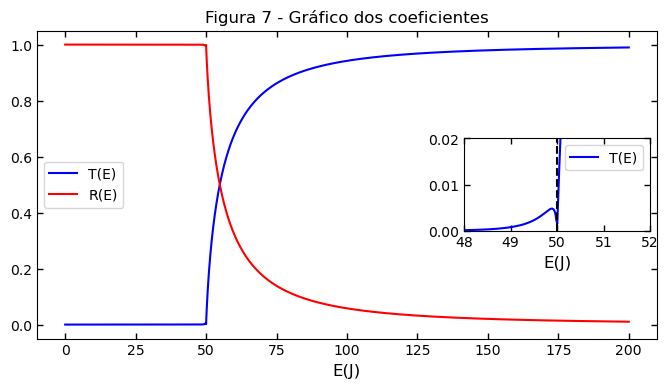

In [103]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(0, 200, 50), minor = True)
plt.yticks(np.arange(0, 1, 0.2), minor = True)

ax.plot(E, T, label = "T(E)", color = "blue")
ax.plot(E, 1 - T, label = "R(E)", color = "red")

plt.title("Figura 7 - Gráfico dos coeficientes", fontsize = 12)
plt.xlabel("E(J)", fontsize = 12)
ax.legend(loc='center left')

ax_inset = inset_axes(ax, width="30%", height="30%", loc='center right')

plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(0, 200, 50), minor = True)
plt.yticks(np.arange(0, 1, 0.2), minor = True)

ax_inset.plot(E, T, label='T(E)', color='blue')
ax_inset.axvline(x = 50, color = 'black', linestyle = '--')

plt.ylim(0, 0.02)
plt.xlim(48, 52)

ax_inset.set_xlabel('E(J)', fontsize = 12)
ax_inset.legend()

$\quad$ Analisando o gráfico da Figura **7**, é possível observar que foi obtido o mesmo comportamento que o gráfico da Figura ****

## Acoplando a variação no tempo

$$ \phi(t) = e^{-iEt/\hbar}$$

In [149]:
T = []
R = []

E = 230
t = np.linspace(0, 1, 100)
for i in range(len(t)):
    psi_i, x_i = fpsi_i(E, -1, 0)
    psi_i, A = psi_norm(psi_i, -1, 0)
    psi_i = psi_i*np.exp(-complex(0, 1)*E*t[i])
    if E<V:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(V - E)*complex(0,1) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(V - E)*complex(0,1)/((np.sqrt(V - E)*complex(0,1) + np.sqrt(E))**2)
        F = temp1*temp2
    else:
        temp1 = A*np.exp(complex(0, 1)*(np.sqrt(E - V) - np.sqrt(E))*a)
        temp2 = 4*np.sqrt(E)*np.sqrt(E - V)/((np.sqrt(E - V) + np.sqrt(E))**2)
        F = temp1*temp2
    x_T = np.linspace(a, 2, 1000)
    psi_T = F*np.exp(-complex(0, 1)*E*t[i])*np.exp(complex(0, 1)*np.sqrt(2*E)*x_T)
    
    T.append(fint(psi_T, x_T, a, 2))
    R.append(1-fint(psi_T, x_T, a, 2))
    

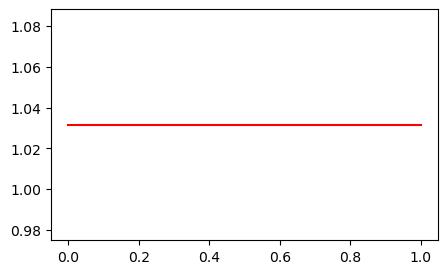

In [150]:
plt.figure(figsize=(5,3))
plt.plot(t,T, "r")

---

## Referências

**[1]** SAKURAI, J. J.; NAPOLITANO, J. MECâNICA QUÂNTICA MODERNA. [s.l.]: Pearson Education, 2013.

**[2]** SHANKAR, R. Principles of Quantum Mechanics. [s.l.]: Springer Science, 1994.

**[3]** RIBEIRO, M. A. C. et al. Os problemas de espalhamento quântico em potenciais elementares. Revista Brasileira de Ensino de Física, [s.l.], no 1, 2004. DOI: https://doi.org/10.1590/s1806-11172004000100001.

**[4]** SAFNE DE SOUZA SILVA, P.; PEREIRA DA SILVA, L. F. Uma Abordagem Didática Do Tunelamento quântico: a Partir Do Estudo Da Barreira Potencial Retangular Simples. Revista Física No Campus, [s.l.], no 2, 2023.

**[5]** _Método Numérico de Numerov_: https://github.com/PETfisicaUFRN/PET.py/blob/main/Notebooks/Metodo_de_Numerov.ipynb

**[6]** Newman, Mark. Computacional Physics. 2012. University of Michigan, 2013.

**[7]** Giordano, N. J., & Nakanishi, H. (2006). Computational physics.